In [1]:
%matplotlib inline

# Data Science with OpenStreetMap and Wikidata

### Nikolai Janakiev [@njanakiev](https://twitter.com/njanakiev/)

# Outline

### Part I: _Wikidata and OpenStreetMap_

- Difference between Wikidata and OpenStreetMap
- Ways to connect data between Wikidata and OpenStreetMap

### Part II: _Data Science with Wikidata and OSM_

- Libraries and Tools
- Exhibition of Various Analyses and Results

# OpenStreetMap Elements

![OSM Elements](assets/osm_elements.png)

# Metadata in OpenStreetMap

![OSM Key Amenity](assets/osm_key_amenity.png)

![OSM Salzburg](assets/osm_salzburg.png)

# Wikidata is a Knowledge Graph

![Knowledge Graph](assets/knowledge_graph.png)

![Wikidata Map](assets/wikidata_july_2019.png)
[Wikidata Map July 2019](https://addshore.com/2019/07/wikidata-map-july-2019/) by Addshore

# Semantic Web and Linked Data

- Linking data sets and entities on the Web

- Core W3C standard: [Resource Description Format (RDF)](https://en.wikipedia.org/wiki/Resource_Description_Framework)

- __1,229 datasets__ with __16,125 links__ (as of June 2018)

![Linked Open Data](assets/linked_open_data.png)

[https://lod-cloud.net/](https://lod-cloud.net/)

![Wikipedia Wikidata Link](assets/wikipedia_wikidata_link.png)

![Wikidata Data Model](assets/wikidata_data_model.png)

# Querying Wikidata with SPARQL

- [https://query.wikidata.org/](https://query.wikidata.org/)

![Wikidata Query](assets/wikidata_query.png)

# All Windmills in Wikidata

```sparql
SELECT ?item ?itemLabel ?image ?location ?country ?countryLabel
WHERE {
  ?item wdt:P31 wd:Q38720.
  OPTIONAL { ?item wdt:P18 ?image. }
  OPTIONAL { ?item wdt:P625 ?location. }
  OPTIONAL { ?item wdt:P17 ?country. }
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
  }
}
```
[Query link](https://w.wiki/5cv)

![Wikidata Windmills](assets/wikidata_windmills.png)

# Linking OpenStreetMap with Wikidata?

![OSM Wikidata Bridge](assets/osm_wikidata_bridge.jpg)

[File:WdOsm-semanticBridge.jpg](https://wiki.openstreetmap.org/wiki/File:WdOsm-semanticBridge.jpg)

# OpenStreetMap to Wikidata

- `wikidata=*`, `wikipedia=*` tags _(stable)_

# Wikidata to OpenStreetMap

- [OSM relation ID (P402)](https://www.wikidata.org/wiki/Property:P402) _(unstable)_ 

- [OSM tag or key (P1282)](https://www.wikidata.org/wiki/Property:P1282) mapping of OSM key-values to Wikidata entities (e.g. [lighthouse](https://www.wikidata.org/wiki/Q39715) and [Tag:man_made=lighthouse](https://wiki.openstreetmap.org/wiki/Tag:man_made=lighthouse))

- [Permanent ID](https://wiki.openstreetmap.org/wiki/Permanent_ID) proposal

# Data Science

# Used Tools and Libraries

- [Jupyter](https://jupyter.org/) - interactive notebook development environment
- [PostGIS](https://postgis.net/) - spatial database extender for [PostgreSQL](http://postgresql.org/)

# Python Libraries

- [NumPy](https://www.numpy.org/) - numerical and scientific computing
- [Pandas](https://pandas.pydata.org/) - data analysis library
- [Matplotlib](https://matplotlib.org/) - 2D plotting library
- [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) - analysis and manipulation of [GEOS](http://trac.osgeo.org/geos/) features
- [GeoPandas](http://geopandas.org/) - Pandas extension for spatial operations and geometric types
- [PySAL](https://pysal.org/) - spatial analysis library
- [Datashader](http://datashader.org/) - graphics pipeline system for large datasets
- [Keras](https://keras.io/) - high-level deep learning library

# OpenStreetMap Elements with Wikidata Tag

# Getting Data From OSM with Overpass API

In [2]:
import requests

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
    [out:json];
    area["ISO3166-1"="RO"][admin_level=2]->.search;
    (node[wikidata](area.search);
      way[wikidata](area.search);
      rel[wikidata](area.search);
    );
    out count;"""
response = requests.get(overpass_url, params={'data': overpass_query})
response.json()

{'elements': [{'id': 0,
   'tags': {'areas': '0',
    'nodes': '13700',
    'relations': '616',
    'total': '16357',
    'ways': '2041'},
   'type': 'count'}],
 'generator': 'Overpass API 0.7.55.7 8b86ff77',
 'osm3s': {'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.',
  'timestamp_areas_base': '2019-08-20T23:06:02Z',
  'timestamp_osm_base': '2019-08-20T23:35:02Z'},
 'version': 0.6}

<img alt="wikidata europe osm points" src="assets/wikidata_europe_osm_points.png" style="width: 80%; height: 80%;" />

<img alt="osm europe wikidata" src="assets/osm_europe_wikidata.png" style="width: 90%; height: 90%;" />

<img alt="osm europe wikidata lisa clusters" src="assets/osm_europe_wikidata_lisa_clusters.png" style="width: 90%; height: 90%;" />

# Wikidata _Instance of_ (P31) Property

# How to load Wikidata Data

- https://query.wikidata.org/sparql/ SPARQL endpoint
- [sparqldataframe](https://github.com/njanakiev/sparqldataframe/) retrieve Pandas dataframe from SPARQL query
- [wdtools](https://github.com/njanakiev/wdtools) Wikidata utilities and tools

In [3]:
import sparqldataframe

query = """
    SELECT ?item ?itemLabel ?location WHERE {
      ?item wdt:P31 wd:Q532.
      ?item wdt:P17 wd:Q218.
      ?item wdt:P625 ?location.
      SERVICE wikibase:label { 
        bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
      }
    }"""

df = sparqldataframe.wikidata_query(query)
df.head()

,item,itemLabel,location
0,http://www.wikidata.org/entity/Q238698,Cașolț,Point(24.28055556 45.77916667)
1,http://www.wikidata.org/entity/Q238916,Boholț,Point(24.91888889 45.88833333)
2,http://www.wikidata.org/entity/Q239159,Bodoș,Point(25.663126 46.076358)
3,http://www.wikidata.org/entity/Q239209,Zăuan-Băi,Point(22.644737 47.247748)
4,http://www.wikidata.org/entity/Q239519,Vultureni,Point(23.5574 46.9646)


## Create and Plot GeoPandas Dataframe

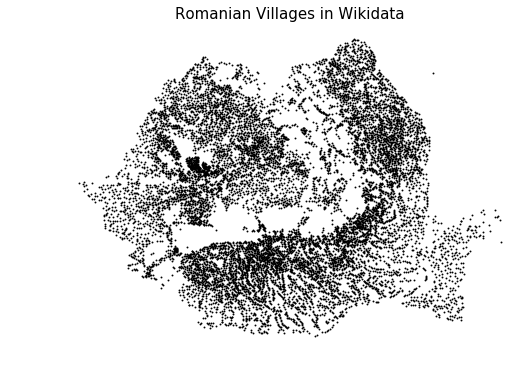

In [4]:
import geopandas as gpd
import shapely.wkt

df['location'] = df['location'].apply(shapely.wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='location', crs={'init': 'epsg:4326'})

ax = gdf.to_crs(epsg=3875).plot(figsize=(12, 6), color='k', markersize=0.8)
ax.set_title('Romanian Villages in Wikidata', fontsize=15)
ax.set_axis_off()

<img alt="wikidata europe points" src="assets/wikidata_europe_points.png" style="width: 80%; height: 80%;" />

<img alt="wikidata europe most common instances" src="assets/wikidata_europe_most_common_instances.png" style="width: 90%; height: 90%;" />

<img alt="wikidata europe companies most common instances" src="assets/wikidata_europe_companies_most_common_instances.png" style="width: 90%; height: 90%;" />

<img alt="wikidata uk companies most common instances" src="assets/wikidata_uk_companies_most_common_instances.png" style="width: 90%; height: 90%;" />

# Analyzing Websites Regionally

<blockquote class="twitter-tweet" data-lang="en-gb"><p lang="en" dir="ltr">I like how everyone is saying that jQuery is dead and at the same time - it powers 70% of the Web</p>&mdash; Tomasz Łakomy (@tlakomy) <a href="https://twitter.com/tlakomy/status/1141327543699726336?ref_src=twsrc%5Etfw">19 June 2019</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# How to Get the Scripts in a Website

In [5]:
import requests
from bs4 import BeautifulSoup

url = "https://www.osgeo.org/"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
for script in soup.find_all('script'):
    src = script.attrs.get('src')
    
    if src is not None:
        # Remove everything before slash
        src = src.split('/')[-1]
        
        # Remove url parameters
        src = src.split('?')[0]
        
        print(src)

polyfill.min.js
ol.js
olms.js
addthis_widget.js#pubid=ra-5409a75e4d21936e
jquery.min.js
scripts.min.js
bundle.js
wp-embed.min.js


<img alt="websites percentage jquery histogram" src="assets/websites_percentage_jquery_histogram.png" style="width: 90%; height: 90%;" />

<img alt="websites percentage jquery" src="assets/websites_percentage_jquery.png" style="width: 90%; height: 90%;" />

<img alt="websites percentage jquery" src="assets/websites_percentage_jquery_lisa_clusters.png" />

# Image Classification with Keras

- [Keras Applications](https://keras.io/applications/)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Using TensorFlow backend.


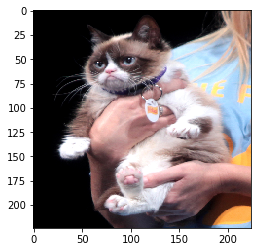

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.preprocessing.image import load_img, img_to_array

# load model weights
vgg_model = vgg16.VGG16(weights='imagenet')

# load and transform image
original = load_img('assets/cat.jpg', target_size=(224, 224))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

plt.imshow(np.uint8(numpy_image))

# Predicting the Class Labels

In [4]:
from keras.applications.imagenet_utils import decode_predictions

# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)

# convert the probabilities to class labels
labels = decode_predictions(predictions)
labels

[[('n03942813', 'ping-pong_ball', 0.107420415),
  ('n02123597', 'Siamese_cat', 0.09706449),
  ('n03793489', 'mouse', 0.05626433),
  ('n03255030', 'dumbbell', 0.05423481),
  ('n02123394', 'Persian_cat', 0.050410405)]]

## Classifying Wikimedia Commons Images

![wikidata companies images classification](assets/wikidata_companies_images_classification.png)

# Data Science with OpenStreetMap and Wikidata

### Nikolai Janakiev [@njanakiev](https://twitter.com/njanakiev/)

- Slides @ [https://janakiev.com/slides/data-science-osm-wikidata](https://janakiev.com/slides/wikidata-mayors)

## Resources

- [Wikidata - OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Wikidata)
- FOSSGIS 2016: [OpenStreetMap und Wikidata](https://www.youtube.com/watch?v=Zcv_7t7RcNM) - Michael Maier
- FOSDEM 2019: [Linking OpenStreetMap and Wikidata A semi-automated, user-assisted editing tool](https://www.youtube.com/watch?v=UWcZ1WKXHNo) - Edward Betts
- [WDTools](https://github.com/njanakiev/wdtools) - Wikidata Utilities and Tools